# 1 - Perkenalan

* Nama       : Luvi Puspitasari
* Batch      : FTDS-012
* Dataset    : Heart Failure
* Source Dataset  : ("https://console.cloud.google.com/bigquery?sq=540278567683:c6d41cc460e040f39407d81fc4729f89")

Query Google Cloud Platform

    select *
    from `ftds-hacktiv8-project.phase1_assignments.heart-failure`

# 2 - Libraries

In [144]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models Definition
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Model Training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Evaluations
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# 3 - Loading Dataset

datasaet berikut berisikan variabel pendukung pasien di rumah sakit yang mana diprediksi terjadinya `heart failure`, dalam case ini diharapkan untuk pemodelan data bisa digunakan mengantisipasi terjadinya kematian secara mendadak dikarenakn salah diagnosa. Model ML yg digunakan adalah Random Forest dan Adaboost.

| Tabel Eksisting | Arti | 
| ----------- | :---------: |
| age | usia |
| anaemia | anemia (0 = negatif; 1 = positif)|
| creatinine_phosphokinase | kreatinin fosfokinase (CPK) |
| diabetes | diabetes (0 = negatif; 1 = positif)|
| ejection_fraction | fungsi jantung (%) |
| high_blood_pressure | tekanan darah (mmHg) |
| platelets | trombosit |
| serum_creatinine  | serum kreatinin (mg/dl) |
| serum_sodium | Kadar natrium serum (mEq/liter) |
| sex | gender (0 = male, 1 = female|
| smoking | merokok (0 = tidak, 1 = iya)|
| time | waktu opname |
| death_event | kematian (0 = tidak, 1 = iya|

In [145]:
# Load dataset

data = pd.read_csv('h8dsft_P1G3_luvi_puspitasari.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [146]:
# Duplicate Dataset

dataset = data.copy()

In [147]:
# Rename Columns

dataset.rename(columns={'DEATH_EVENT': 'death'}, inplace=True)
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
age,42.0,46.0,65.0,53.0,50.0,70.0,65.0,70.0,60.0,59.0,...,64.0,62.0,53.0,70.0,60.0,63.0,45.0,70.0,53.00,50.0
anaemia,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.00,0.0
creatinine_phosphokinase,250.0,168.0,160.0,91.0,582.0,125.0,52.0,161.0,76.0,280.0,...,1610.0,30.0,196.0,171.0,95.0,122.0,308.0,97.0,446.00,582.0
diabetes,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0
ejection_fraction,15.0,17.0,20.0,20.0,20.0,25.0,25.0,25.0,25.0,25.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.00,62.0
high_blood_pressure,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.00,1.0
platelets,213000.0,271000.0,327000.0,418000.0,279000.0,237000.0,276000.0,244000.0,196000.0,302000.0,...,242000.0,244000.0,220000.0,176000.0,337000.0,267000.0,377000.0,220000.0,263358.03,147000.0
serum_creatinine,1.3,2.1,2.7,1.4,1.0,1.0,1.3,1.2,2.5,1.0,...,1.0,0.9,0.7,1.1,1.0,1.2,1.0,0.9,1.00,0.8
serum_sodium,136.0,124.0,116.0,139.0,134.0,140.0,137.0,142.0,132.0,141.0,...,137.0,139.0,133.0,145.0,138.0,145.0,136.0,138.0,139.00,140.0
sex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0


**Dataset Overview**

In [148]:
# Overview of Data
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [149]:
# Dataset Shape

dataset.shape

(299, 13)

In [150]:
# head 
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [151]:
# tail
dataset.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Dari dataset diatas dapat dilihat bahwa terdiri dari 299 rows dan 13 columns

# 4 - Exploratory Data Analysis

Pada Bagian EDA,berisikan analyst data yang digunakan, dari distribusi, frekwensi, korelasi dan lainnya.

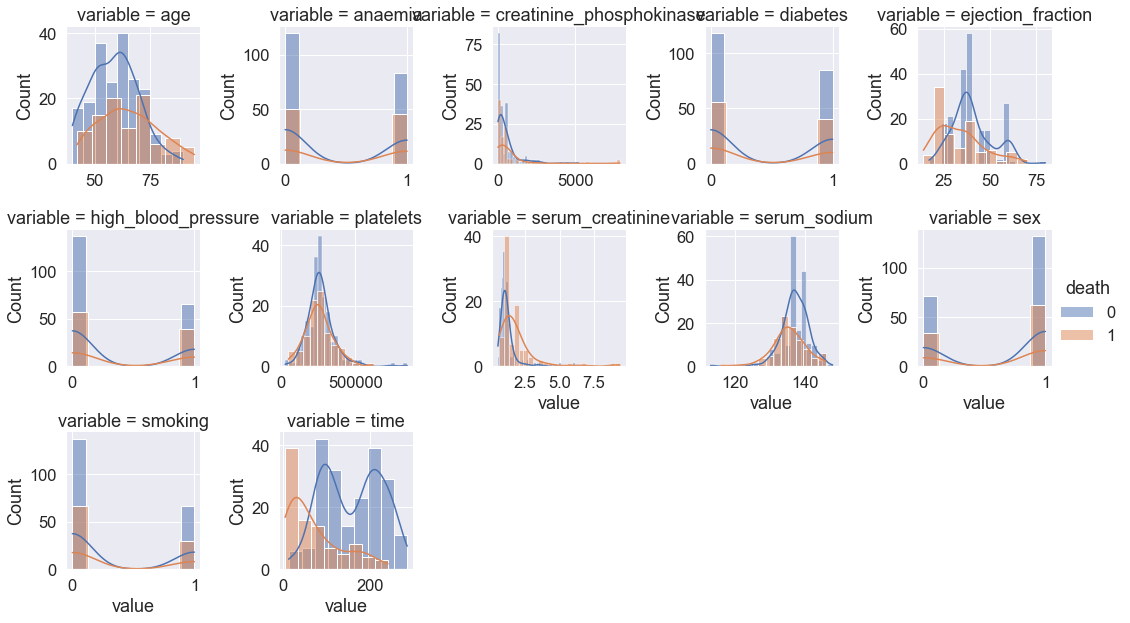

In [152]:
# Create Histogram Target `death`

output = 'death'
cols = [ f for f in dataset.columns if dataset.dtypes[ f ] != "object"]
f = pd.melt( dataset, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.histplot, "value", kde=True).add_legend()

In [153]:
# grouping age vs death
data_df = dataset.groupby(by=["age", "death"]).death.agg(["sum"]).reset_index()
data_df

,age,death,sum
0,40.0,0,0
1,41.0,0,0
2,42.0,0,0
3,42.0,1,1
4,43.0,0,0
...,...,...,...
68,87.0,1,1
69,90.0,0,0
70,90.0,1,2
71,94.0,1,1


> berikut adalah usia-usia yang rentan terjadinya `heart failure`


In [154]:
# total per sex
dataset.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

> untuk pasien terdiri dari 1(female) ada 194 orang, dan 0(male) ada 105 orang

In [155]:
# Compare "death" column with "sex" column

pd.crosstab(dataset.death, dataset.sex)

sex,0,1
death,,
0,71,132
1,34,62


> kemarian kebaynyakan terjadi pada 34 orang pada male dan 62 orang pada female

In [156]:
# Compare "death" column with "smoking" column
pd.crosstab(dataset.death, dataset.smoking)

smoking,0,1
death,,
0,137,66
1,66,30


> korelasi antara `death` dan `smoking` adalah dari jumlah keseluruhan pasien perokok ada 30 orang yang meninggal, dan bukan perokok tapi meninggal ada 66 orang

Korelasi kolom target (death) dengan kolom pendukung
1. age vs death :  terjadinya kematian banyak di range usia 50 - 75 tahun sebanding dengan jumlah pasiennnya yang mana tertinggi juga ada di rentan usia 50 - 75 tahun
2. anaemia vs death : anaemia terjadi pada yang meninggal dan tidak meninggal. Tetapi kebanyakan terjadi pada orang yang tidak tercatat meninggal.
3. diabetes vs death : diabetes terjadi kepada kedua kelompok, tetapi diabetes bukan satu-satunya penyebab orang meninggal,
4. high blood pressure vs death : high blood pressure sama dengan diabetes dan anaemia, kedua kelompok memiliki history pengidap tekanan darah tinggi, tetapi bukan salah satu pemicu kematian,
5. sex vs death : ada 2 kelompok, 0 untuk laki-laki, dan 1 untuk wanita.jika di grouping, angka kematian lebih banyak terjadi kepada laki-laki dibanding perempuan.
6. smoking vs death : ada 2 kelompok, 0 untuk tidak merokok dan 1 untuk perokok. Dari data yang ada, untuk kematian yang berhubungan dengan perokok sangatlah sedikit dibanding dengan yang tidak merokok

Dari data diatas dapat dilihat bahwa female lebih banyak yang checkup kesehatan daripada laki-laki


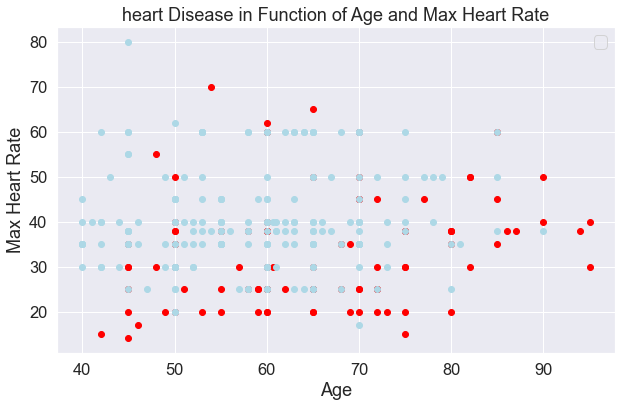

In [157]:
# Age vc Max. Heart rate for Heart Disease

# create another figure
plt.figure(figsize=(10,6))

#Scatter with positive excamples
plt.scatter(dataset.age[dataset.death==1],
            dataset.ejection_fraction[dataset.death==1],
            c="red")

# Scatter with negative excamples
plt.scatter(dataset.age[dataset.death==0],
            dataset.ejection_fraction[dataset.death==0],
            c="lightblue")

# Add some helpful info
plt.title("heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend("Disease", "No Disease")

> antara age dan heart disease, ternyata kebanyakan meninggal (red) direntan usia 40 - diatas 90 tahun dan max heart rate dibawah 50

(13.0, 0.0)

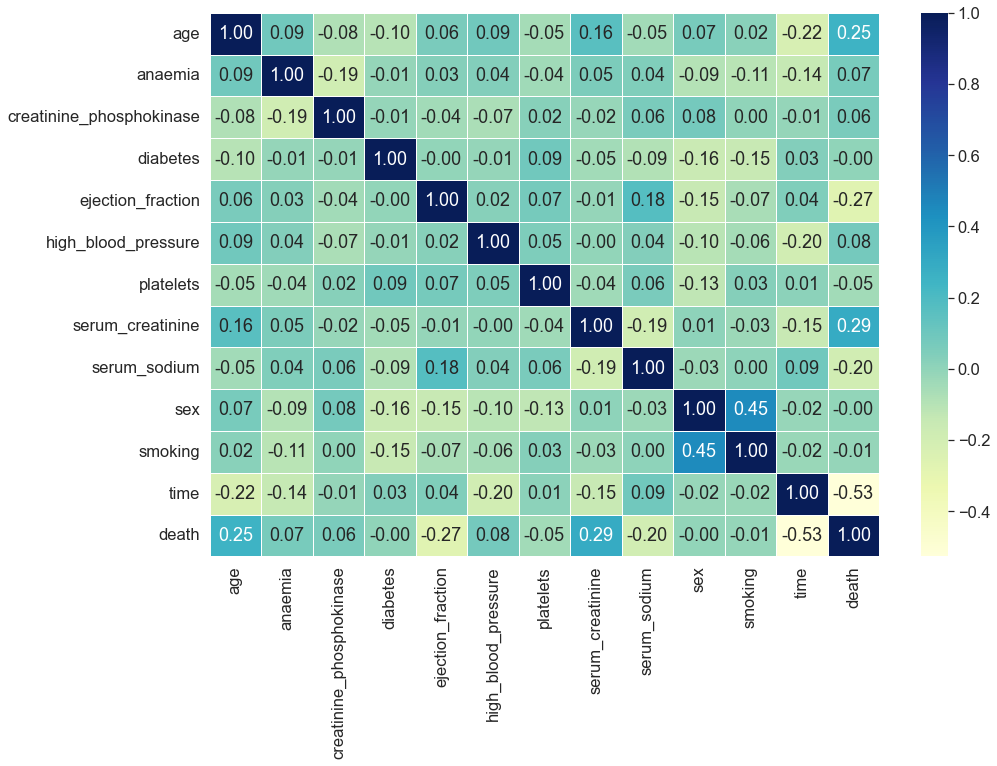

In [158]:
# Let's make our correlation matrix

corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                    annot=True,
                    linewidths=0.5,
                    fmt=".2f",
                    cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

Dari grafik heatmap diatas kolom death dipengaruhi oleh serum_creatinine dan age (usia).

<AxesSubplot:title={'center':'Correlation with death'}>

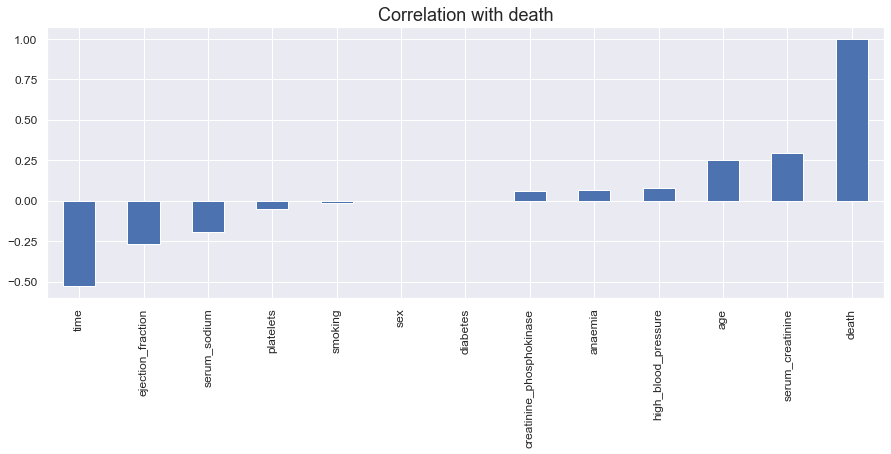

In [159]:
dataset.corrwith(dataset['death']).sort_values().plot.bar(figsize=(15,5), title='Correlation with death', fontsize=12, grid=True)

# 5 - Data Preprocessing

**Data Splitting**

Pada data splitting akan dibagi menjadi 3
1. Inference Set : 
2. Train Set : digunakan untuk melatih algoritma dalam mencari model yang sesuai,
3. Test Set : dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing

Proporsi split data 80% untuk train-set dan 20% untuk test-set

In [160]:
# data inference
data_inf = dataset.sample(10, random_state=5)

In [161]:
# Remove Inference-Set from Dataset

data_train_test = dataset.drop(data_inf.index)

In [162]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

#### Splitting Dataset

In [163]:
# Split data into X and y
# Data yang akan digunakan diluar data target
X = data_train_test.drop("death", axis=1)

# Data yang memiliki target
y = data_train_test["death"]

In [164]:
# Split into train & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (231, 12)
Test Size :  (58, 12)


**Handling Outlier**

Identify Variable Distribution

In [165]:
# Normal Distribution

def out_std(dataset, column):
    global lower, upper
    # Calculate the mean and std of the data frame
    data_mean, data_std = dataset[column].mean(), dataset[column].std()

    # Calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off

    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(dataset[dataset[column] > upper])/len(dataset)*100)

    print('Percentage', percentage)
        
    # Calculate the number of records below and above lower and above bound value respectively
        
    df1 = dataset[dataset[column] > upper] 
    df2 = dataset[dataset[column] < lower]
    i = ('Total number of outlier are', df1.shape[0] + df2.shape[0], 'Percentage', percentage)


In [166]:
print(" -------------Detection age Outlier--------------")
out_std(dataset, 'age')
print(" -------------Detection anaemia Outlier--------------")
out_std(dataset, 'anaemia')
print(" -------------Detection creatinine_phosphokinase Outlier--------------")
out_std(dataset, 'creatinine_phosphokinase')
print(" -------------Detection diabetes Outlier--------------")
out_std(dataset, 'diabetes')
print(" -------------Detection ejection_fraction Outlier--------------")
out_std(dataset, 'ejection_fraction')
print(" -------------Detection high_blood_pressure Outlier--------------")
out_std(dataset, 'high_blood_pressure')
print(" -------------Detection platelets Outlier--------------")
out_std(dataset, 'platelets')
print(" -------------Detection serum_creatinine Outlier--------------")
out_std(dataset, 'serum_creatinine')
print(" -------------Detection sex Outlier--------------")
out_std(dataset, 'sex')
print(" -------------Detection smoking Outlier--------------")
out_std(dataset, 'smoking')
print(" -------------Detection time Outlier--------------")
out_std(dataset, 'time')
print(" -------------Detection DEATH_EVENT Outlier--------------")
out_std(dataset, 'death')


 -------------Detection age Outlier--------------
The lower bound value is 25.149465754455186
The upper bound value is 96.51832019872205
Percentage 0.0
 -------------Detection anaemia Outlier--------------
The lower bound value is -1.0568836773089365
The upper bound value is 1.9197599314895384
Percentage 0.0
 -------------Detection creatinine_phosphokinase Outlier--------------
The lower bound value is -2329.0241772543645
The upper bound value is 3492.7031070202506
Percentage 2.341137123745819
 -------------Detection diabetes Outlier--------------
The lower bound value is -1.0641409946419305
The upper bound value is 1.900261395979723
Percentage 0.0
 -------------Detection ejection_fraction Outlier--------------
The lower bound value is 2.579089817016232
The upper bound value is 73.58813426325133
Percentage 0.33444816053511706
 -------------Detection high_blood_pressure Outlier--------------
The lower bound value is -1.083238568626361
The upper bound value is 1.7855797057501068
Percenta

*Mendefiniskan IQR, lower dan upper*

In [167]:
# Skewed Distribution

def out_iqr(dataset, column):
    global lower, upper
    q25, q75 = np.quantile(dataset[column], 0.25), np.quantile(dataset[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    #calculate the outlier cutoff
    cut_off = iqr * 1.5


    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(dataset[data[column] > upper])/len(dataset)*100)

    print('The IQR is', iqr, 'The lower bound is', lower, 'The upper bound value is', upper, 'Percentage', percentage)

    # calculate the number of records below and above lower and above bound value respectively
    df1 = dataset[dataset[column] > upper]
    df2 = dataset[dataset[column] < lower]
    
    return print('Total number of outliers are', df1.shape[0] + df2.shape[0])

In [168]:
print(" -------------Detection age Outlier--------------")
out_iqr(dataset, 'age')
print(" -------------Detection anaemia Outlier--------------")
out_iqr(dataset, 'anaemia')
print(" -------------Detection creatinine_phosphokinase Outlier--------------")
out_iqr(dataset, 'creatinine_phosphokinase')
print(" -------------Detection diabetes Outlier--------------")
out_iqr(dataset, 'diabetes')
print(" -------------Detection ejection_fraction Outlier--------------")
out_iqr(dataset, 'ejection_fraction')
print(" -------------Detection high_blood_pressure Outlier--------------")
out_iqr(dataset, 'high_blood_pressure')
print(" -------------Detection platelets Outlier--------------")
out_iqr(dataset, 'platelets')
print(" -------------Detection serum_creatinine Outlier--------------")
out_iqr(dataset, 'serum_creatinine')
print(" -------------Detection sex Outlier--------------")
out_iqr(dataset, 'sex')
print(" -------------Detection smoking Outlier--------------")
out_iqr(dataset, 'smoking')
print(" -------------Detection time Outlier--------------")
out_iqr(dataset, 'time')
print(" -------------Detection DEATH_EVENT Outlier--------------")
out_iqr(dataset, 'death')

 -------------Detection age Outlier--------------
The IQR is 19.0 The lower bound is 22.5 The upper bound value is 98.5 Percentage 0.0
Total number of outliers are 0
 -------------Detection anaemia Outlier--------------
The IQR is 1.0 The lower bound is -1.5 The upper bound value is 2.5 Percentage 0.0
Total number of outliers are 0
 -------------Detection creatinine_phosphokinase Outlier--------------
The IQR is 465.5 The lower bound is -581.75 The upper bound value is 1280.25 Percentage 9.698996655518394
Total number of outliers are 29
 -------------Detection diabetes Outlier--------------
The IQR is 1.0 The lower bound is -1.5 The upper bound value is 2.5 Percentage 0.0
Total number of outliers are 0
 -------------Detection ejection_fraction Outlier--------------
The IQR is 15.0 The lower bound is 7.5 The upper bound value is 67.5 Percentage 0.6688963210702341
Total number of outliers are 2
 -------------Detection high_blood_pressure Outlier--------------
The IQR is 1.0 The lower bou

KeyError: 'death'

> Outliers tidak di handle karena masih dibawah 10% dan diatas merupakan riwayat kesehatan seseorang

**Missing Values**


In [ ]:
# Detect Missing Values

def missing_values_table_(data) :

    # Total missing values
    mis_val = dataset.isnull().sum()

    # Precentage of missing values
    mis_val_percent = 100 * dataset.isnull().sum() / len(dataset)

    # Make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(dataset.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
# Missing Values X_train

train_missing = missing_values_table_(X_train)
train_missing

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Missing Value di kolom target**

In [ ]:
# Cek missing value di y_train
print('missing values di y_train :', y_train.isna().any())

# Cek missing value di X
print('missing values di y_test :', y_test.isna().any())

missing values di y_train : False
missing values di y_test : False


> Tidak terdapat missing value dalam dataset ini

#### Feature Selection

In [ ]:
# Display X_train

X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
185,73.0,0,582,0,35,1,203000.00,1.30,134,1,0,195
116,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241
25,50.0,0,2522,0,30,1,404000.00,0.50,139,0,0,214
94,75.0,0,675,1,60,0,265000.00,1.40,125,0,0,205
275,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...
151,50.0,0,185,0,30,0,266000.00,0.70,141,1,1,112
146,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30
273,65.0,1,68,1,60,1,304000.00,0.80,140,1,0,79
218,65.0,0,1688,0,38,0,263358.03,1.10,138,1,1,250


**Split between Numerical Columns and Categorical Columns**

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Categorical Columns :  []


In [ ]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_columns]

X_test_num = X_test[num_columns]

In [ ]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)

In [ ]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)

# 6 - Model Definition

1. Algoritma yang dipakai adalah 
    - Random Forest Classifier
    - Adaboost

**Random Forest Classifier**

In [ ]:
# Model
RF = RandomForestClassifier()

# Model Pipeline
pipe_RF = Pipeline([('preprocessing', scaler),
            ('RF', RF)])

# Hyperparameter
param_RF = {'n_estimators' : [5, 20, 50],
            'max_depth' : [1, 2, 3],
            'max_features' : ["sqrt", "auto"],
            'criterion': ['gini','entropy']}

**Adaboost**

In [ ]:
# Model
Ada = AdaBoostClassifier(random_state=5)

# Model Pipeline
pipe_Ada = Pipeline([('preprocessing', scaler),
            ('Ada', Ada)])

# Hyperparameter
param_Ada = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
                'learning_rate': [0.1, 0.5, 1, 10, 50],
                'algorithm': ['SAMME', 'SAMME.R']}

# 7 - Model Training

Pada sub bab ini berisikan Model Training menggunakan Cross Validation dan Hyperparameter Tuning


In [ ]:
# Cross Validation

num_folds = 10
seed = 7
scoring = 'f1_macro'
ensemble = []
ensemble.append(('RF', RandomForestClassifier()))
ensemble.append(('Ada', AdaBoostClassifier()))

results = []
names = []
for name, model in ensemble:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f "%(name, cv_results.mean(), cv_results.std())
    print(msg)

RF 0.806887 0.111281 
Ada 0.775977 0.075575 


> Untuk Cross Validation 
- RF memiliki mean 0.8 dan std 0.11
- Ada memiliki mean 0.77 dan std 0.07

# 8 - Model Evaluation

**Hyperparameter tuning with RandomizedSearchCV**

We're going to tune:
* RandomForestClassifier
* Adaboost

**Random Forest Classifier**

In [ ]:
# Hyperparameter Random Forest Classifier

grid_RF = GridSearchCV(estimator=RF, 
                        param_grid=param_RF, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_RF.fit(X_train_final, y_train)

best_estimator_RF = grid_RF.best_estimator_
best_param_RF = grid_RF.best_params_
print(best_param_RF)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
# Hyperparameter Adaboost

grid_Ada = GridSearchCV(estimator=Ada, 
                        param_grid=param_Ada, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_Ada.fit(X_train_final, y_train)

best_estimator_Ada = grid_Ada.best_estimator_
best_param_Ada = grid_Ada.best_params_
print(best_param_Ada)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 11}


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:606: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:606: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:6

***Model Evaluation - Random Forest Classifier***

In [ ]:
# Classification Report
print('---------- Train-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_train, best_estimator_RF.predict(X_train_final), target_names=['Not Death', 'Death']))
print('---------- Test-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_test, best_estimator_RF.predict(X_test_final), target_names=['Not Death', 'Death']))

# Performance Metrics
print('---------- Train-set RF Performance ---------')
print(roc_auc_score(y_train, best_estimator_RF.predict(X_train_final)))
print('---------- Test-set RF Performance ---------')
print(roc_auc_score(y_test, best_estimator_RF.predict(X_test_final)))

---------- Train-set Random Forest Classifier Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.89      0.97      0.93       160
       Death       0.93      0.73      0.82        71

    accuracy                           0.90       231
   macro avg       0.91      0.85      0.88       231
weighted avg       0.90      0.90      0.90       231

---------- Test-set Random Forest Classifier Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.80      0.97      0.88        37
       Death       0.92      0.57      0.71        21

    accuracy                           0.83        58
   macro avg       0.86      0.77      0.79        58
weighted avg       0.84      0.83      0.82        58

---------- Train-set RF Performance ---------
0.8536971830985914
---------- Test-set RF Performance ---------
0.7722007722007722


***Model Evaluation - Adaboost***

In [ ]:
# Classification Report
print('---------- Train-set Naive Bayes Classification Report ---------')
print(classification_report(y_train, best_estimator_Ada.predict(X_train_final), target_names=['Not Death', 'Death']))
print('---------- Test-set Naive Bayes Classification Report ---------')
print(classification_report(y_test, best_estimator_Ada.predict(X_test_final), target_names=['Not Death', 'Death']))

# Performance Metrics
print('---------- Train-set Adaboost Performance ---------')
print(roc_auc_score(y_train, best_estimator_Ada.predict(X_train_final)))
print('---------- Test-set Adaboost Performance ---------')
print(roc_auc_score(y_test, best_estimator_Ada.predict(X_test_final)))

---------- Train-set Naive Bayes Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.87      0.94      0.91       160
       Death       0.84      0.69      0.76        71

    accuracy                           0.87       231
   macro avg       0.86      0.82      0.83       231
weighted avg       0.86      0.87      0.86       231

---------- Test-set Naive Bayes Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.86      0.97      0.91        37
       Death       0.94      0.71      0.81        21

    accuracy                           0.88        58
   macro avg       0.90      0.84      0.86        58
weighted avg       0.89      0.88      0.87        58

---------- Train-set Adaboost Performance ---------
0.8169454225352113
---------- Test-set Adaboost Performance ---------
0.8436293436293437


> Model yang digunakan adalah Adaboost Classifier karena untuk precision (False True) basefit.

# 9 - Model Inference


> Dataset yang sudah diproses, mari kita coba dengan data yang baru

In [ ]:
# Load Dataset

dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [ ]:
# Split dataset X (train) dan y (target)

# X_inf
X_inf = data_inf.drop(['death'], axis=1)

# use same variables in final features
X_inf = X_inf[num_columns]

# y will be consist of target parameter only
y_inf = data_inf['death']

In [ ]:
# Feature Scaling
scaler.fit(X_inf)
data_inf_final = scaler.transform(X_inf)
data_inf_final

array([[0.        , 0.        , 0.08037383, 0.        , 0.33333333,
        0.        , 0.32278481, 0.3539823 , 0.54545455, 1.        ,
        1.        , 1.        ],
       [0.        , 1.        , 0.10093458, 0.        , 0.44444444,
        0.        , 0.13924051, 0.08849558, 1.        , 0.        ,
        0.        , 0.87623762],
       [0.22857143, 1.        , 0.15700935, 1.        , 0.22222222,
        1.        , 0.25316456, 0.79646018, 0.        , 0.        ,
        0.        , 0.90594059],
       [0.71428571, 0.        , 0.20560748, 0.        , 1.        ,
        0.        , 0.37568373, 0.7079646 , 0.72727273, 0.        ,
        0.        , 0.        ],
       [0.42857143, 1.        , 0.24859813, 0.        , 0.55555556,
        0.        , 0.37568373, 0.42477876, 0.63636364, 1.        ,
        1.        , 0.9950495 ],
       [0.14285714, 0.        , 1.        , 1.        , 0.4       ,
        1.        , 0.37568373, 0.42477876, 0.63636364, 0.        ,
        0.        ,

In [ ]:
# Model for Inference

Ada.fit(X_inf, y_inf)

AdaBoostClassifier(random_state=5)

In [ ]:
y_pred_inf = Ada.predict(data_inf_final)
y_pred_inf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Create Dataframe of DEATH prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['DEATH - prediction'])
y_pred_inf_df

,DEATH - prediction
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
# Concate between Inference-Set and Rating's Prediction

data_inf.index = y_pred_inf_df.index
inf_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
inf_final.T

,0,1,2,3,4,5,6,7,8,9
age,40.0,40.0,48.0,65.00,55.00,45.00,59.0,75.00,58.0,60.0
anaemia,0.0,1.0,1.0,0.00,1.00,0.00,1.0,1.00,1.0,1.0
creatinine_phosphokinase,90.0,101.0,131.0,157.00,180.00,582.00,129.0,582.00,200.0,47.0
diabetes,0.0,0.0,1.0,0.00,0.00,1.00,0.0,0.00,1.0,0.0
ejection_fraction,35.0,40.0,30.0,65.00,45.00,38.00,45.0,30.00,60.0,20.0
high_blood_pressure,0.0,0.0,1.0,0.00,0.00,1.00,1.0,0.00,0.0,0.0
platelets,255000.0,226000.0,244000.0,263358.03,263358.03,263358.03,362000.0,225000.00,300000.0,204000.0
serum_creatinine,1.1,0.8,1.6,1.50,1.18,1.18,1.1,1.83,0.8,0.7
serum_sodium,136.0,141.0,130.0,138.00,137.00,137.00,139.0,134.00,137.0,139.0
sex,1.0,0.0,0.0,0.00,1.00,0.00,1.0,1.00,0.0,1.0


$Problem : $

1. Apakah yang dimaksud dengan Bagging?
2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

$Answer :$
1. Bagging adalah  penggabungan algoritma pembelajaran mesin (machine learning) yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma machine learning yang digunakan dalam klasifikasi statistik dan regresi
2. Adaboost dan Randim Forest :
- Adaboost merupakan algoritma ensemble yang memanfaatkan bagging dan boosting untuk mengembangkan peningkatan akurasi prediktor. 
best parameter untuk adaboost dataset diatas adalah : `{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 11}`
-  Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Best parameter untuk RF adalah 
`{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}`
Kedua model diatas mirip, tetapi yang membuat berbeda adalah 
    - stumps forest, stumps merupakan pohon yang terbuat dari satu cabang dan dua daun,
    - stumps yang dibangun tidak memiliki bobot yang sama pada prediksi akhir, 


$Model Analysis :$
1. Model yang digunakan adalah Random Forest Classifier, dalam hal ini dipilih Adaboost, karen untuk `PRECISION` basefit. untuk Random Forest terlihat Overfit, sehingga tidak dipilih dalam model kali ini.
2. Jika kedua model dicoba ke data inference, hasilnya sama antara Adaboost dan Random Forest. 

$Overall Analysis :$
1. Dari sampel yang diambil untuk 10 pasien, dalam dataset diprediksi adanya `death` hanya 4 pasien, sedangkan jika aplikasikan dengan metode Adaboost, `death` diprediksi akan terjadi pada semua pasien (10 orang),
2. Dalam kasus ini bisa jadi tenaga medis akan salah memberikan terapi kepada pasien, sehingga akan ditakutkan akan terjadinya kematian karena salah prediksi